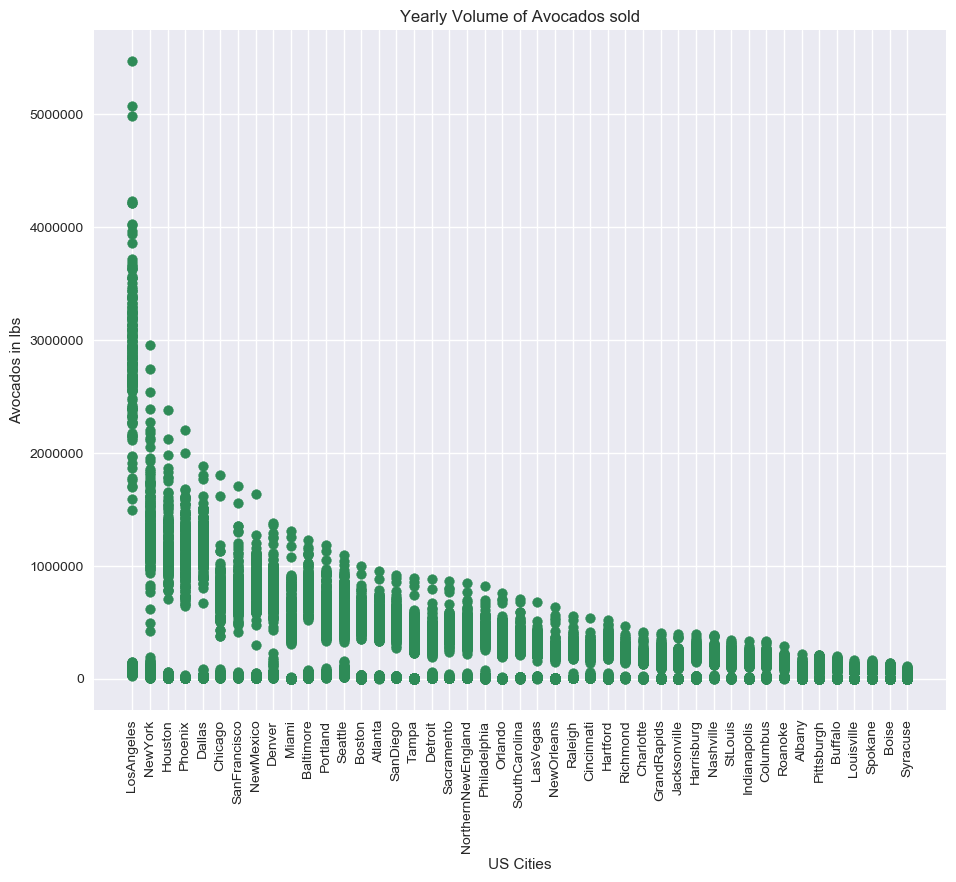

In [556]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
%matplotlib inline
from scipy import stats

#Sure, millenials love their Avocados, but how much?! (Over-arching question)
    #Using region, research percantage of millenials vs boomers, gen x etc, and see how sales(total volume) 
    #are impacted
 
#How much are millenials willing to pay for their precious green fruit?
    #Average price per avocado vs volume in certain regions

data = pd.read_csv('avocado.csv')
df = pd.DataFrame(data)

#Clean up certain names, some of the data wasn't titled the way I liked, this changed that.
df['region'] = df['region'].str.replace("BaltimoreWashington", "Baltimore")
df['region'] = df['region'].str.replace("BuffaloRochester", "Buffalo")
df['region'] = df['region'].str.replace("CincinnatiDayton", "Cincinnati")
df['region'] = df['region'].str.replace("DallasFtWorth", "Dallas")
df['region'] = df['region'].str.replace("HarrisburgScranton", "Harrisburg")
df['region'] = df['region'].str.replace("HartfordSpringfield", "Hartford")
df['region'] = df['region'].str.replace("MiamiFtLauderdale", "Miami")
df['region'] = df['region'].str.replace("NewOrleansMobile", "NewOrleans")
df['region'] = df['region'].str.replace("PhoenixTucson", "Phoenix")
df['region'] = df['region'].str.replace("RaleighGreensboro", "Raleigh")
df['region'] = df['region'].str.replace("RichmondNorfolk", "Richmond")
df['region'] = df['region'].str.replace("WestTexNewMexico", "NewMexico")


#Remove the data I don't want (States, regions, and totals, only want cities)
#this removes specifc parts of columns, for example here im removing certain states from the 'region' column
#df=df[np.logical_not(df['column you want to access here'].isin(["data in the column you want gone"]))]

df=df[np.logical_not(df['region'].isin(["West", 'California', 'TotalUS', 'Plains', 'Southeast', 'SouthCentral', 'Northeast', 'Midsouth', 'GreatLakes']))]

#To remove an entire column of data:
#df = df.drop('What you want to remove here', axis=1)

#To sort our data so it graphs neatly...
df.sort_values('Total Volume', ascending=False, inplace=True)

# find zscores (This is incase I need to remove outliers. Not necessary here)
#z = np.abs(stats.zscore(df.iloc[:, 3]))
# get indices of outliers
#outliers= list(np.where(z > 3)[0])
# drop them
#df= df.drop(outliers)

#Make graph larger or smaller. Use figsize and dpi! 
figure(num=None, figsize=(11, 9), dpi=100, facecolor='w', edgecolor='k')

#Scatter plot region vs volume in pounds
plt.scatter(x=df['region'], y=df['Total Volume'], norm=True, color='seagreen')
plt.xticks(rotation=90)
plt.title('Yearly Volume of Avocados sold')
plt.ylabel('Avocados in lbs')
plt.xlabel('US Cities')
plt.style.use('seaborn')
plt.show()

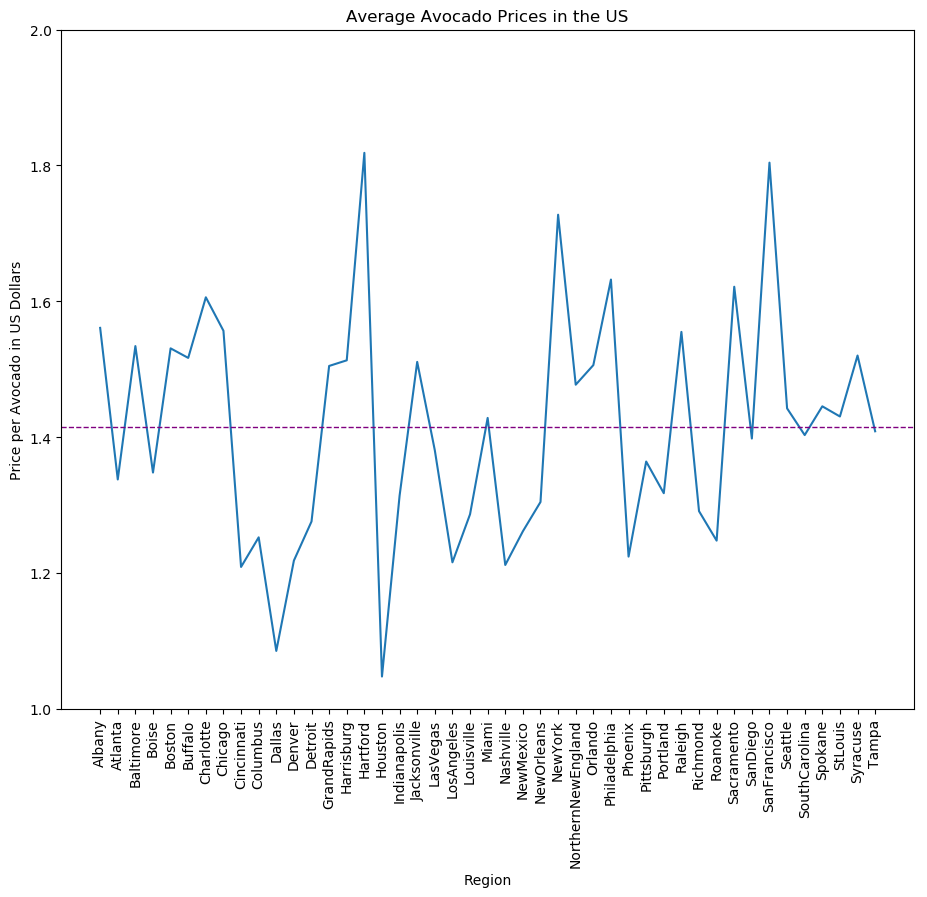

The average price of Avocados in the US is $1.41


In [443]:
df.sort_values('Total Volume', ascending=False, inplace=True)
df.groupby('region').aggregate(np.mean)

figure(num=None, figsize=(11, 9), dpi=100, facecolor='w', edgecolor='k')
plt.plot(df.groupby('region')['AveragePrice'].mean())
plt.title('Average Avocado Prices in the US')
plt.xlabel('Region')
plt.ylabel('Price per Avocado in US Dollars')
plt.axhline(df['AveragePrice'].mean(), color='purple', linestyle='dashed', linewidth=1)
plt.ylim(1, 2)


plt.xticks(rotation=90)
plt.show()


price = np.sum(df.AveragePrice)/len(df.AveragePrice)
priceround = ("%.2f" % round(price,2))
print('The average price of Avocados in the US is ${}'.format(priceround))

#We can see here Houston has by far the lowest average avocado price while Hartford(somewhat surprsingly) narrowly
#beats out San Fransisco for the highest average price of $1.81 per avocado

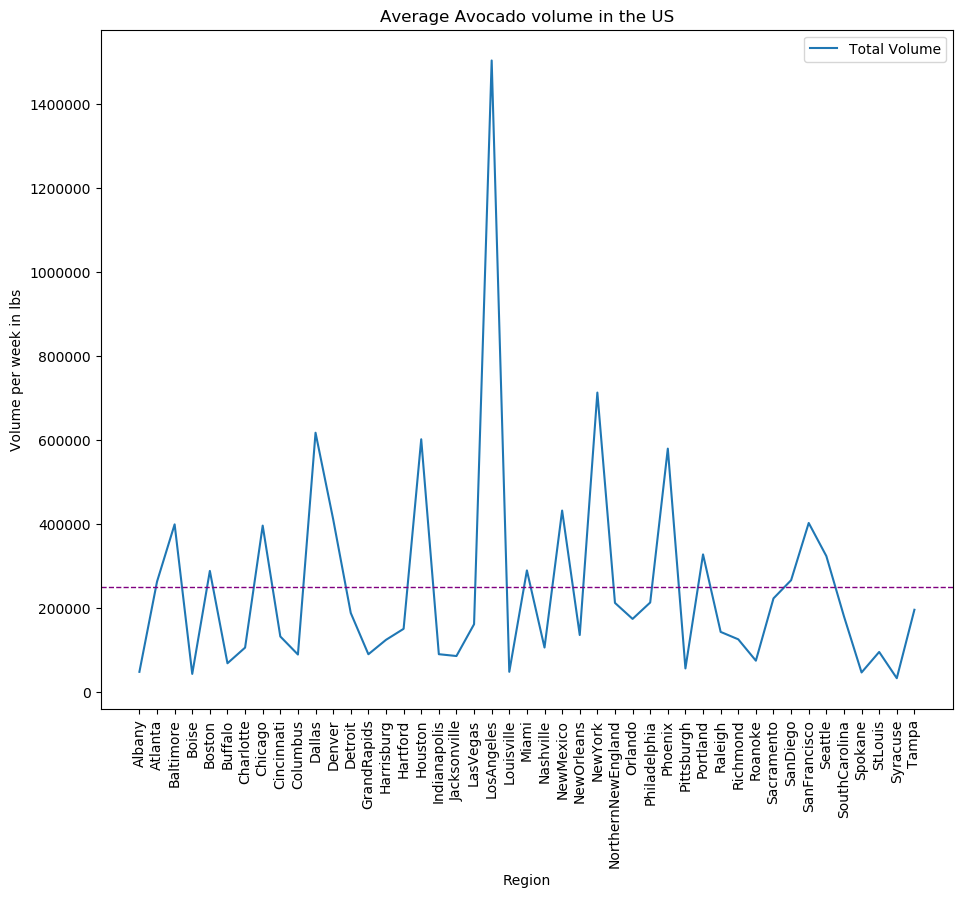

The average weekly volume of Avocados in the US is 249485.25lbs


In [285]:
figure(num=None, figsize=(11, 9), dpi=100, facecolor='w', edgecolor='k')
plt.plot(df.groupby('region')['Total Volume'].mean())
plt.title('Average Avocado volume in the US')
plt.xlabel('Region')
plt.ylabel('Volume per week in lbs')
plt.axhline(df['Total Volume'].mean(), color='purple', linestyle='dashed', linewidth=1)

plt.legend()


plt.xticks(rotation=90)
plt.show()
volume = np.sum(df['Total Volume'])/len(df['Total Volume'])
volumeround = ("%.2f" % round(volume,2))
print('The average weekly volume of Avocados in the US is {}lbs'.format(volumeround))

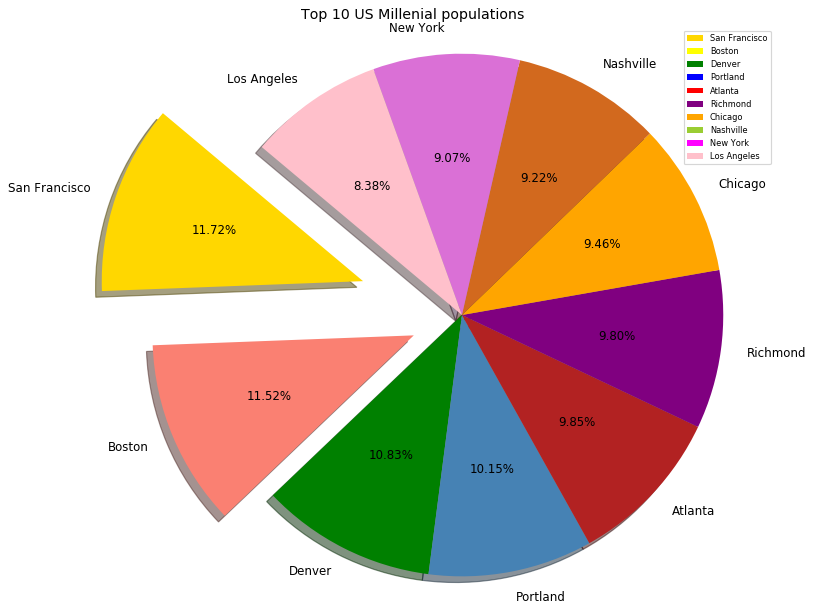

In [283]:
figure(num=None, figsize=(11, 9), dpi=85, facecolor='w', edgecolor='k')

labels = 'San Francisco', 'Boston', 'Denver', 'Portland', 'Atlanta', 'Richmond', 'Chicago', 'Nashville', 'New York', 'Los Angeles'
sizes = [239, 235, 221, 207, 201, 200, 193, 188, 185, 171]
colors = ['gold', 'salmon', 'green', 'steelblue', 'firebrick', 'purple', 'orange', 'chocolate', 'orchid', 'pink']
explode = (0.4, .2, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.2f%%', shadow=True, startangle=140)
plt.legend(patches, labels, loc="upper right", prop={'size': 7})
plt.title('Top 10 US Millenial populations')
plt.tight_layout

plt.axis('equal')
plt.show()

In [532]:
#Here I cleaned up data so I can look at whats relevant easier
#df = df.drop('Date', axis=1)
#df = df.drop('Unnamed: 0', axis=1)
#df = df.drop('4046', axis=1)
#df = df.drop('4225', axis=1)
#df = df.drop('type', axis=1)
#df = df.drop('4770', axis=1)

#df.groupby('region').aggregate(np.mean)

In [533]:
#df = df[df.region != 'West']
#df.groupby('region').aggregate(np.mean)

In [348]:
#Los angeles 3900000pop / 1500000 volume. Los angeles 0.385 avocados per person (app) (weekly volume/population)
#San Fransisco 884500pop / 402000 volume. San Francisico 0.454 app
#Boston 685000pop / 288000 volume. Boston 0.420 app
#Denver 704600pop / 411000 volume. Denver 0.583 app
#Portland 647800pop / 327000. Portland 0.505 app
#Atlanta 486300pop / 262000. Atlanta 0.539 app
#Richmond 227000pop / 125000. Richmond 0.551 app
#Chicago 2700000pop / 396000. Chicago 0.147 app
#Nashville 667500pop / 105000 volume. Nashville 0.157 app
#New York 8600000pop / 712000 volume. New York 0.083 app

#note: populations numbers taken from google

#Notable mention! Hartford CT boasts the most expensive avocado average at $1.82/avocado. But ALSO has 
# one of the highest app at 1.215 avocados per person. Whatever Hass is doing in Hartford they are wildly successful.
# Hartford has a similar millenial population to Los Angeles (for reference) but almost 4x avocado consumption

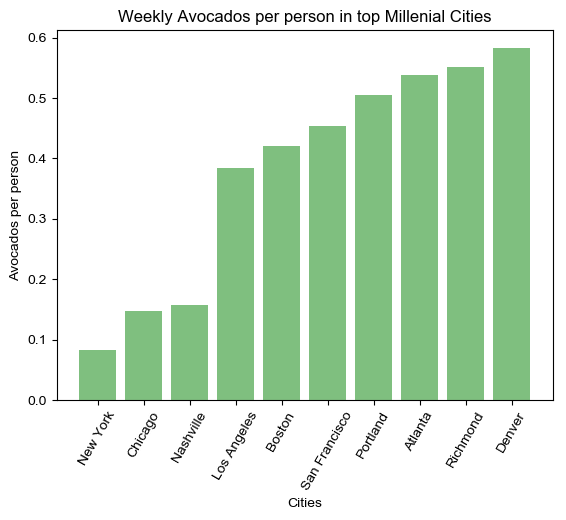

In [531]:
#Lets (hopefully) make a bar graph for app of top 10 millenial cities and see if the data lines up
import matplotlib.pyplot as plt; plt.rcdefaults()

Cities = ('New York', 'Chicago', 'Nashville', 'Los Angeles', 'Boston', 'San Francisco', 'Portland', 'Atlanta', 'Richmond', 'Denver')
y_pos = np.arange(len(Cities))
app = [0.083, 0.147, 0.157, 0.385, 0.420, 0.454, 0.505, 0.539, 0.551, 0.583]

plt.bar(y_pos, app, align='center', alpha=0.5, color='green')
plt.xticks(y_pos, Cities)
plt.ylabel('Avocados per person')
plt.xlabel('Cities')
plt.title('Weekly Avocados per person in top Millenial Cities')
plt.xticks(rotation=60)
plt.style.use('seaborn')

plt.show()



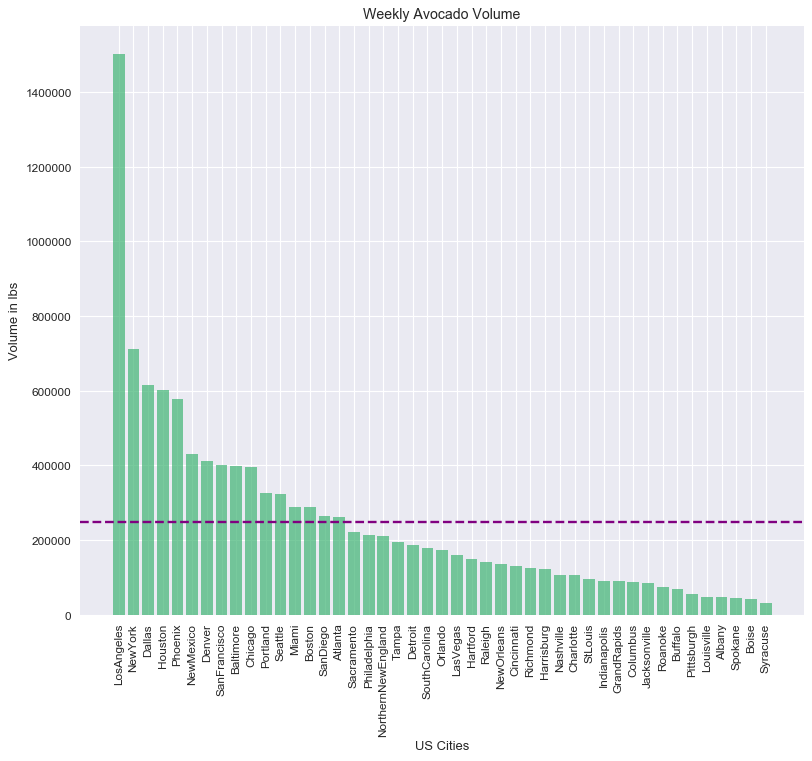

The average weekly volume of Avocados in the US is 249485.25lbs


In [534]:
alisha = df.groupby('region', as_index=False)['Total Volume'].mean()
alisha.sort_values('Total Volume', ascending=False, inplace=True)

figure(num=None, figsize=(11, 9), dpi=85, facecolor='w', edgecolor='k')

plt.bar(alisha['region'], alisha['Total Volume'], align='center', alpha=0.69, color='mediumseagreen')
plt.xticks(rotation=90)
plt.xlabel('US Cities')
plt.ylabel('Volume in lbs')
plt.title('Weekly Avocado Volume')
plt.axhline(alisha['Total Volume'].mean(), color='purple', linestyle='dashed', linewidth=2)
plt.style.use('seaborn')
plt.show()

volume = np.sum(df['Total Volume'])/len(df['Total Volume'])
volumeround = ("%.2f" % round(volume,2))
print('The average weekly volume of Avocados in the US is {}lbs'.format(volumeround))

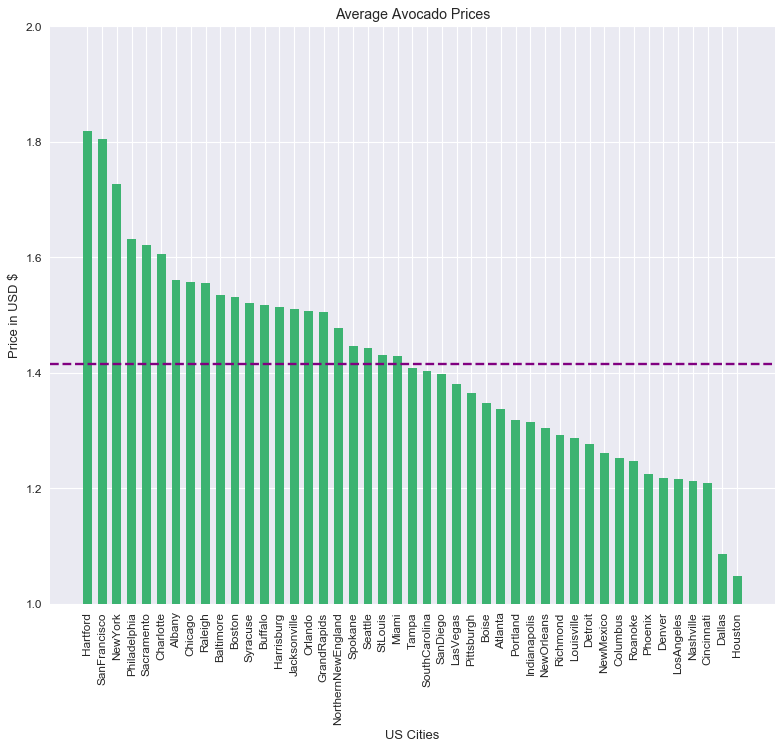

The average price of Avocados in the US is $1.41


In [529]:
alisha = df.groupby('region', as_index=False)['AveragePrice'].mean()
alisha.sort_values('AveragePrice', ascending=False, inplace=True)

figure(num=None, figsize=(11, 9), dpi=85, facecolor='w', edgecolor='k')

plt.bar(alisha['region'], alisha['AveragePrice'], width=0.6, color='mediumseagreen')
plt.xticks(rotation=90)
plt.xlabel('US Cities')
plt.ylabel('Price in USD $')
plt.title('Average Avocado Prices')
plt.axhline(alisha['AveragePrice'].mean(), color='purple', linestyle='dashed', linewidth=2)
plt.ylim(1,2)
plt.style.use('seaborn')
plt.show()

price = np.sum(df.AveragePrice)/len(df.AveragePrice)
priceround = ("%.2f" % round(price,2))
print('The average price of Avocados in the US is ${}'.format(priceround))

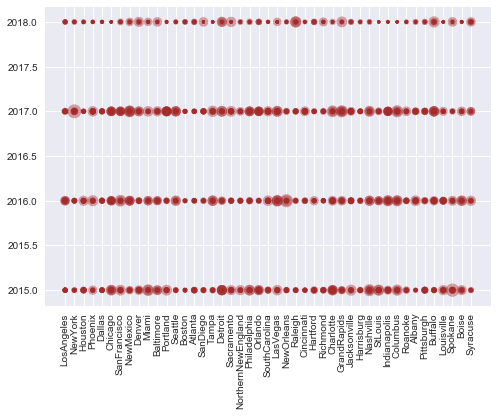

In [557]:
plt.scatter(df['region'], df['year'], s=z*15, c="brown", alpha=0.4)
plt.xticks(rotation=90)
plt.show()


In [558]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
6829,47,2017-02-05,0.53,5470227.08,1741607.02,937331.61,89678.63,2701609.82,2656630.42,3465.70,41513.70,conventional,2017,LosAngeles
8749,7,2018-02-04,0.73,5070580.56,2532500.54,965716.73,93806.56,1478556.73,1414064.63,21441.60,43050.50,conventional,2018,LosAngeles
3998,46,2016-02-07,0.58,4982700.11,1262681.15,1447533.80,98684.40,2173800.76,1911608.83,245385.02,16806.91,conventional,2016,LosAngeles
6830,48,2017-01-29,0.60,4230448.98,1439453.61,741369.62,67607.57,1982018.18,1923042.64,29993.97,28981.57,conventional,2017,LosAngeles
6831,49,2017-01-22,0.62,4215552.57,1715034.11,663032.28,61799.24,1775686.94,1710186.48,39625.95,25874.51,conventional,2017,LosAngeles
6816,34,2017-05-07,0.87,4214313.10,1745366.17,583071.39,97893.53,1787982.01,1727340.36,488.13,60153.52,conventional,2017,LosAngeles
1191,47,2015-02-01,0.74,4031949.04,2770656.27,854673.24,64439.70,342179.83,308754.64,31108.07,2317.12,conventional,2015,LosAngeles
1178,34,2015-05-03,0.78,4015563.02,2914047.44,670161.40,61569.48,369784.70,356360.42,11566.37,1857.91,conventional,2015,LosAngeles
4003,51,2016-01-03,0.64,3967109.33,1232109.79,992212.57,90511.09,1652275.88,1415836.57,226121.90,10317.41,conventional,2016,LosAngeles
3985,33,2016-05-08,0.64,3942054.31,1416928.16,929683.64,107683.95,1487758.56,1104179.23,362931.85,20647.48,conventional,2016,LosAngeles
